## The Data Reduction Process

### About This Notebook 

**This notebook (@author Shrihan Agarwal) is written like it is a replacement for the reduce.py, but it is recommended that you run it using the reduce.py file and terminal.** Follow the setup directories and data as shown below.
  
The observing log for this example/template data collection (22 June, 2018) can be found at in this repository [here](./TheReductionGuide_example_observing_log.pdf)

---

### Set Up Directories and Data

In the main directory, E.g. 20jul14os, set up the necessary directories, i.e.:

* `mkdir reduce`
* `mkdir clean`
* `mkdir combo`
* `ln -s <downloaded raw/ folder>`
    * Eg. `ln -s /g/lu/data/KECK/20200525_OSIRIS/IMAG/raw/` (Symbolic link to location of downloaded /raw file)
    * If you haven't downloaded the data from KECK yet, follow the instructions in the next header first.
    * If working with NIRC2 data, make sure file names are in the `n####.fits` format (i.e. the "Original File Name" from the observation). Data downloaded from the KOA may have file names with a different scheme and will need to be renamed to reflect the Original File Name. The Original File Name can be found under the FITS keyword `FILENAME` for each file.
  
---

### Downloading the Data (@raw directory)

In general, if we haven't, we'll need to download the data itself from Keck. The summary is given below. Example imaging datasets, from both the NIRC2 and OSIRIS instruments, are also available at this [Google Drive link](https://drive.google.com/drive/folders/1FpTN3wiG4U826H328JIJcPLbScNCTRQW?usp=sharing).

#### Downloading Using SCP/FTP

1. Make a directory in the correct place on the group computers, e.g.: **cd /g/lu/data/KECK**
2. mkdir <YYYYMMDD>_OSIRIS (with date in UT) | This is the directory name Eg. 20jul14os (Although this doesn't obey the same naming convention, it's similar.)  
3. VNC into Keck computers  
4. Open an xterm window (right click → Login Windows → xterm (local))  
5. In the xterm window, cd into the data directory (find this in the observing log)  
6. scp the data, e.g.  `scp -r * <username>@spray.astro.berkeley.edu:/g/lu/data/KECK/<YYYYMMDD>_OSIRIS  `
7. Change permissions so other people in the group can access and move (when you scp, it only gives you permissions), e.g on the directory, run:  `chmod -R g+rwx *`
---

### Quirks of OSIRIS 

Your data might be from OSIRIS rather than NIRC2, although this template is for NIRC2. The process is similar, but there are a few things to keep in mind.  

* Dataset frame numbers may usually begin at 2. This is just a quirk of Osiris. 
* OSIRIS images are also flipped the wrong way. This is why double images of _flip and not flip exist. **Make sure you are using the flipped one!! That's the correct one.** 


### General Directory Structure

Once the entire process of data reduction is done, the directory structure might look something like the following. This might be useful to refer to.

- `2014jul14os/`
    * **`@raw`** (symbolic link to downloaded files)
        * **Original image files** (Eg. `<framename>_flip.fits`, if OSIRIS data)
        * **.log** file with descriptions of images
    * **`reduce/`** (create this directory, then copy over a reduce.py and analysis.py from another date, other files generated/chosen during reduction)
        * **reduce.py** (for the reduction), otherwise this notebook can replace it.
        * **analysis.py** (for the analysis), otherwise the TheCompleteAnalysisGuide.ipynb can replace it.
        * `<filter>/`
            * **sci_files directories** of objects (Eg.`sci_<target>/`)
            * **sky_files directories** of objects (Eg.`sky_<target>/`)
        * calib/
            * **darks/** directory of dark files 
            * **flats/** directory of flats
            * **masks/** directory of masks
    * **`clean/`** (create this directory, but files within are generated by reduction)
        * `<target>_<filter>/`
            * **Cleaned image frames**: .coo, .max, .fits (Eg. `c<framename>_flip.fits`)
            * **strehl_source.txt** (Descriptive file containing strehl values of individual frames)
            * distort/
            * masks/
            * weight/
    * **`combo/`** (create this directory, but files within are generated by reduction)
        * **Submap files**: .coo, .max, \_sig.fits, \_driz.log, .fits (Eg. `/m<date>_<target>_<filter>_<submap number>.fits`)
        * **Combined files**: .coo, .max, \_sig.fits, \_driz.log, .fits  (Eg. `/mag<date>_<target>_<desc>.fits`)
            * \_driz.log is the log generated from the stacked data 
            * \_driz.lis records all the images that went into the combined image
            * .fits is the combined/stacked final image after reduction
        * **`starfinder/`**

File name components:

* `<filter>` is the name of the filter used. In the example of /20jul14os used, `<filter>` is `kp_tdOpen`.
* `<framename>`:
    * For OSIRIS, e.g.: `i200714-a011008`, consists of `i`: image, `200714`: date, `a`: random letter, `011`: dataset number, and `008`: frame number.
    * For NIRC2, e.g.: `n0035.fits`, consists of prefix `n` and image number `0035`
* `<target>` is the name of the target. In the example of /20jul14os, it is kb200101.
* `<submap number>` is simply a number for the submap indicating which submap it is, e.g. 1  

File types:

* `.coo` are the coordinates of the reference source in x, y of the frame
* `.max` is the saturation limit, after correcting for the cleaning of the data   
* `.fits` is an image file.

**Note: The naming conventions and files themselves may differ from one date/folder to another, and from OSIRIS to NIRC2 - this is just a general structure.**

---

### Running reduce.py to reduce data

Follow KAI installation as detailed [here](https://keck-datareductionpipelines.github.io/KAI/#installation)

Reduction is carried out in the `iraf27` conda environment, activated by the following command
```bash
conda activate iraf27
```

All reduction steps are run from the `reduce/` directory:
```bash
cd reduce/
```

Make a reduce.py script to carry out the reduction. You can follow the format of [the template reduce script for NIRC2](./reduce/reduce_template.py) or [the template reduce script for OSIRIS](./reduce/reduce_template_osiris.py).

In the `reduce/` directory, the functions in the `reduce.py` script can be run in a python environment, e.g. `ipython`:
```python
import reduce

reduce.makelog()

reduce.go()
```

### The components of reduce.py

1. At the beginning, we get into the correct environment and import the necessary packages. Run the following in a terminal window, and ensure the necessary packages are imported to reduce.py.

`conda activate iraf27`  
`mkiraf`

In [ ]:
# #
# General Notes:
# -- python uses spaces to figure out the beginnings
#    and ends of functions/loops/etc. So make sure
#    to preserve spacings properly (indent). This
#    is easy to do if you use emacs with python mode
#    and color coding.
# -- You will probably need to edit almost every
#    single line of the go() function.
# -- If you need help on the individual function calls,
#    then in the pyraf prompt, import the module and
#    then print the documentation for that function:
#    --> print kai.kailog.__doc__
#    --> print range.__doc__
#
##################################################

# Turn off header deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# Import python and iraf modules
from pyraf import iraf as iraf                 # If this pyraf import isn't working, make sure you're in an iraf27
import numpy as np                             # environment. The process to enable this is the conda activate call above. 
import os, sys
import glob

# Import our own custom modules
from kai.reduce import calib
from kai.reduce import sky
from kai.reduce import data
from kai.reduce import util
from kai.reduce import dar
from kai.reduce import kai_util
from kai import instruments

2. Change epoch to the directory name of the folder (date) to be used. 

As opposed to nirc2 reduction, OSIRIS reduction requires you to create the `osiris` instrument object and add `instrument = osiris` to most function calls. You'll see this below. However, if you're doing NIRC2 reduction, no `instrument = nirc2` is necessary, since it already defaults to NIRC2.

In [ ]:
##########
# Change the epoch, instrument, and distortion solution.
##########
epoch = '19apr21os'
osiris = instruments.OSIRIS()  # Add this line if it is OSIRIS reduction.

3. Modify makelog_and_prep_images().
  
    * This function will make the log files in the `raw/` directory. Just ensure you've added instruments = osiris to kai_util.makelog(), if it's OSIRIS reduction.
    * In addition for OSIRIS, we also **flip the images**. OSIRIS images are initially flipped the wrong way, so we need to flip them back before we start reducing it. Make absolutely sure that you are using the \_flip files that are generated by this step in all future parts of the reduction process.
    * Lastly, we get the weather condition from dar as well.
    
For this example specifically, the files are stored in an image_log.txt file instead.

In [2]:
##########
# Make electronic logs
#    - run this first thing for a new observing run.
##########
def makelog_and_prep_images():
    """Make an electronic log from all the files in the ../raw/ directory.
    The file will be called kai.log and stored in the same directory.

    @author Jessica Lu
    @author Sylvana Yelda
    """
    kai_util.makelog('../raw', instrument = osiris)  # Remove instruments = osiris if nirc2.

    # If you are reducing OSIRIS, you need to flip the images first. If nirc2, remove this as well.
    raw_files = glob.glob('../raw/i*.fits')
    osiris.flip_images(raw_files) 

    # Download weather data we will need.
    dar.get_atm_conditions('2020')

    return

Excerpt of the image_log.txt/kai.log file generated by the above is shown below. This resembles the observing logs.

FOR THIS EXAMPLE:
 * i200714_a010023: Frame name as described in the directory structure section. For nirc2, n00##.
 * KB200101: This is the target in the example we have taken. We should use these as our sci_files (a.k.a, good files).
 * Darks: These are frames taken with a filter that shuts out light, so that noise can be subtracted out.
 * Test: These are tricky! Normally, we can ignore them as they are just the observer testing out the telescope. If there is more than 3-4, however, there is a likelihood that some of the tests are actually useful target files. Check the manual logs in the Observing Logs Google Drive, which will indicate whether or not the Test files are actually mislabeled sci files.
 * SkyFlat: Although not in this example, this would be a skies/flats file, which is also used in the process. I've added a separate example for it below. Sky files tell us about the skies during the imaging, so we subtract those out (in principle can use dark exposures instead) and Flat files tell us about noise and thermal effects in the closed dome, all of which must be subtracted out.
 * 11.802: Integration time for this frame. Note: If the number of coadds > 1, we have to multiply the integration times by the number of coadded frames to get the true effective integration time.
 * 1 3 x 4: The 1 here is the number of coadded frames during imaging itself, and the 3 x 4 is the Fowler samples x number of reads. The Fowler samples of 3 says that multiple reads are being done, i.e. 4 in this case. The 3 is a flag that indicates that "it will be Fowler sampled".
 * Kp: Filter used during imaging.
 * open: State of dichroic - can be opened or closed.



In [ ]:
 i200714_a010023  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # Note the naming scheme 
 i200714_a010024  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # for the images here
 i200714_a010025  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # follows the above naming scheme
 i200714_a010026  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # described at the beginning.
 i200714_a010027  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # These are Dataset 10, 20/07/14
 i200714_a010028  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_a010029  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # KB200101 are the scifiles/target 
 i200714_a010030  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # Darks are the darks
 i200714_a010031  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # Tests are mostly pre-testing of 
 i200714_a010032  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # the telescope before imaging
 i200714_a010033  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_a010034  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # 11.802 is the integration time.
 i200714_a010035  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open  
 i200714_a010036  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_a010037  KB200101 11.802    1  3 x  4  Kp         imag   Kp-LHex open   # The 1 is the coadd. 
 i200714_a011002  Darks    11.802    1  3 x  4  Drk        imag   Drk    open    # The 3 x 4 is the status/reads
 i200714_a011003  Darks    11.802    1  3 x  4  Drk        imag   Drk    open    
 i200714_a011004  Darks    11.802    1  3 x  4  Drk        imag   Drk    open   
 i200714_a011005  Darks    11.802    1  3 x  4  Drk        imag   Drk    open    # The Kp/Drk is the filter used
 i200714_a011006  Darks    11.802    1  3 x  4  Drk        imag   Drk    open   
 i200714_a011007  Darks    11.802    1  3 x  4  Drk        imag   Drk    open   
 i200714_a011008  Darks    11.802    1  3 x  4  Drk        imag   Drk    open    # LHex refers to the Pupil
 i200714_a011009  Darks    11.802    1  3 x  4  Drk        imag   Drk    open   
 i200714_a011010  Darks    11.802    1  3 x  4  Drk        imag   Drk    open    # Multiply integration time 
 i200714_a011011  Darks    11.802    1  3 x  4  Drk        imag   Drk    open    # by num of coadds 
 i200714_a012002  Darks    11.802    4  3 x  4  Drk        imag   Drk    open   
 i200714_a012003  Darks    11.802    4  3 x  4  Drk        imag   Drk    open    # Open refers to the dichroic
 i200714_a012004  Darks    11.802    4  3 x  4  Drk        imag   Drk    open   
 i200714_a012005  Darks    11.802    4  3 x  4  Drk        imag   Drk    open   
 i200714_a012006  Darks    11.802    4  3 x  4  Drk        imag   Drk    open   
 i200714_s001002  Test     5.901    1  3 x  1  Kp         imag   Kp-LHex open    # check tests against online logs
 i200714_s001003  Test     5.901    1  3 x  4  Kp         imag   Kp-LHex open    # First 3-4 are usu actual tests
 i200714_s001004  Test     5.901    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_s001005  Test     5.901    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_s001006  Test     5.901    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_s001007  Test     5.901    1  3 x  4  Kp         imag   Kp-LHex open   
 i200714_s001008  Test     5.901    1  3 x  4  Kp         imag   Kp-LHex open
***************************************************************************************************************
#Example for a different date, different star, for flats (from NIRC2, above was OSIRIS)
n0066  SkyFlat             10.000    3  3 x 16  Kp         narrow open   # Since these ones are taken from a nirc2
n0067  SkyFlat             10.000    3  3 x 16  Kp         narrow open   # reduction, they have a different 
n0068  SkyFlat             10.000    3  3 x 16  Kp         narrow open   # file naming scheme!
n0069  SkyFlat             10.000    3  3 x 16  Kp         narrow open   
n0070  SkyFlat             10.000    3  3 x 16  Kp         narrow open   
n0071  SkyFlat             10.000    3  3 x 16  Kp         narrow open   
n0072  SkyFlat             10.000    3  3 x 16  Kp         narrow open   
n0073  SkyFlat             10.000    3  3 x 16  Kp         narrow open   

You can replace your log file path here to compare with the above.

In [ ]:
your_log_file = "../raw/image_log.txt"
!cat $your_log_file

4. Modify multiple parameters in the go_calib() method, which creates the calibration images, masks, etc, in a freshly generated `calib/` directory in `reduce/`.
 * Select dark files and match them to their corresponding target files by matching the coadds and integration times (using the image_log.txt file above), and then change the range() in the below list comprehensions accordingly. **For OSIRIS, we need to provide the entire filename in the list. This is in contrast to nirc2, where we can just add the range() directly to the function call.** Since this is an OSIRIS example, the entire name is added, but an example of NIRC2 range() is also provided.
 * Below, darks with certain integration times and coadds and reads were added in a mask named accordingly for 19apr21os, using the image_log.txt. Eg. `dark_11.802s_1ca_4rd.fits` for 
 * Flats, if available, are also used to subtract the open dome and closed dome noise, removing temperature effects from the dome. The also should be matched like the darks.
 * Finally, these two are combined in the mask. The input for this is the names of the two filenames we chose in the functions before (the string parameters). Use the naming convention for the darks as described below.

All relevant calibration files and masks are stored in `reduce/calib/`. Darks are in `calib/darks/` for example.

In [3]:

##########
# Reduce
##########
def go_calib():
    """Do the calibration reduction.

    @author Jessica Lu
    @author Sylvana Yelda
    """

    ####################
    #
    # Calibration files:
    #     everything created under calib/
    #
    ####################
    # Darks - created in subdir darks/
    #  - darks needed to make bad pixel mask
    #  - store the resulting dark in the file name that indicates the
    #    integration time (2.8s) and the coadds (10ca).
    #    -- If you use the OSIRIS image, you must include the full filename in the list. 
    
    darkFiles = range(23, 27 + 1) # for NIRC2
    darkFiles = ['i200714_s001{0:03d}_flip'.format(ii) for ii in range(23, 27+1)] # for OSIRIS
    
    # The below name scheme is 'dark_<integration time>s_<coadds>ca_<reads>rd'
    calib.makedark(darkFiles, 'dark_39.832s_1ca_6rd.fits', instrument=osiris) # remove instrument = osiris if nirc2.
    
    darkFiles = range(18, 32 + 1) # for NIRC2
    darkFiles = ['i200714_s001{0:03d}_flip'.format(ii) for ii in range(28, 32+1)] # for OSIRIS
    calib.makedark(darkFiles, 'dark_5.901s_1ca_4rd.fits', instrument=osiris)

    darkFiles = ['i200714_a011{0:03d}_flip'.format(ii) for ii in range(2, 11+1)]
    calib.makedark(darkFiles, 'dark_11.802s_1ca_4rd.fits', instrument=osiris)

    darkFiles = ['i200714_a012{0:03d}_flip'.format(ii) for ii in range(2, 6+1)]
    calib.makedark(darkFiles, 'dark_11.802s_4ca_4rd.fits', instrument=osiris) 
    

    # Flats - created in subdir flats/
    offFiles = ['i200714_s001{0:03d}_flip'.format(ii) for ii in range(3, 21+1, 2)] # for NIRC2, just do the range.
    onFiles  = ['i200714_s001{0:03d}_flip'.format(ii) for ii in range(4, 22+1, 2)]
    calib.makeflat(onFiles, offFiles, 'flat_kp_tdOpen.fits', instrument=osiris)
    # The above's name scheme is 'flat_<filter>_<dichroic>.fits'
    
    # Masks (assumes files were created under calib/darks/ and calib/flats/)
    # Use a long exposure mask (>20 sec) for this makemask. 
    calib.makemask('dark_39.832s_1ca_6rd.fits', 'flat_kp_tdOpen.fits',
                   'supermask.fits', instrument=osiris)


5. You'll need to check if the image frames (sci_files) are good or not using ds9! Possible issues could include clouding out of the image, or loss of AO tracking - if so, don't include these frames in the later steps. Make sure you take notes of why/what you're doing, or add it as comments. Below is a useful function for this.

In [13]:
def plot_image(imagePath, flip = False):

    # Initializing the Image
    img = fits.getdata(imagePath)
   
    # Get image dimensions and make relative to reference
    x_axis = np.arange(img.shape[0], dtype=float)
    y_axis = np.arange(img.shape[1], dtype=float)

    
    # Extent of image to beplotted in imshow
    extent = [x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]]
    
    # Flips image in case it's backwards
    if flip:
        x_axis *= -1
        img = np.flip(img, axis = 1)
        extent = [x_axis[-1], x_axis[0], y_axis[0], y_axis[-1]]
    
    # Plotting prerequisites
    vmin = 10
    vmax = 1e5
    norm = LogNorm(vmin, vmax)
       
    
    # Plot the image
    plt.figure(figsize=(10,8))

    plt.imshow(img, cmap='gist_heat_r', norm=norm, extent=extent, origin = "lower")
    
    # Plot titles, etc.
    plt.colorbar(label='Starlist Magnitude (mag)')
    plt.xlabel('Pixel Coordinates (pixel)')
    plt.ylabel('Pixel Coordinates (pixel)')
    plt.axis('equal')
    plt.title(imagePath.split("/")[-1])
    
    
    return

Example:

In [ ]:
from matplotlib.colors import LogNorm
plot_image("../clean/ci200714_a009002_flip.fits", flip = False) #replace path with the frames you're checking

6. The `go_<target>()` method also needs to be heavily modified (nearly every line). Overall, once we give it the good images of the target, it makes the sky mask, cleans the data, then calculates Strehl values for all the images, and finally combine all the frames into one reduced image! 

 * Input the target name into the target variable.
 * Find the relevant sci_files (good target images in image_log.txt) and add them by changing the range() accordingly. Make sure all the sci_files you're adding have the **same** integration and coadds as each other.
 * Input refSrc, the [x, y] coordinates of the target in the very first cleaned sci_frame. Do not choose any other star. It hardcodes this value as the value of the target in the analysis. Ensure you're using the flipped image! You'll need to do this manually in ds9.
 * If the sky files are unavailable, we can use darks instead, which is what we do in the example. The justification for this, to quote Prof. Lu: "If the sky is just a flat constant over the whole field, then no need to subtract it."
 * data.clean() places cleaned frames in the clean folder under which three groups of files are created: .coo and .max and .fits, described below.  
 * data.calcStrehl() calculates the Strehl value of the object in question for all the frames! It outputs this into a single strehl_source.txt file, described after this. You can find this file in clean/target_kp_tdOpen.
 * data.combine() combines the data, and places it in `combo/`. Submaps indicates how many the stack number should be divided into (usually when we have a lot of frames), and trim should be set to zero if we have small frame amounts (usually the case for microlensing). The results from this are placed in the `/<epoch>/combo` directory - starting with m for the submaps (and ending with the submap number) and mag for the combined one! 


.coo files have the coordinates of the reference star.  
.max files have the saturation limit for the image, modified according to the reduction and cleaning we are doing.  
.fits files have the cleaned frame itself! You can check it out using ds9. 

In [8]:
def go():
    """
    Do the full data reduction.
    """
    ##########
    #
    # <insert target name>
    #
    ##########

    ##########
    # Kp-band reduction
    ##########
    util.mkdir('kp')
    os.chdir('kp')

    #    -- If you have more than one position angle, make sure to
    #       clean them seperatly.
    #    -- Strehl and Ref src should be the pixel coordinates of a bright
    #       (but non saturated) source in the first exposure of sci_files.
    #    -- If you use the OSIRIS image, you must include the full filename in the list. 
    
    target = 'kb200101'
    refSrc = [500, 500] # This is the target pixel coords. For OSIRIS, enure you're using the flipped image.
    
    sci_files = ['i200714_a009{0:03d}_flip'.format(ii) for ii in range(2, 28+1)]
    # Clouds came in around here... I just picked "good enough" ones by eye.
    sci_files += ['i200714_a009{0:03d}_flip'.format(ii) for ii in [31, 33, 34, 37]]
    sci_files += ['i200714_a009{0:03d}_flip'.format(ii) for ii in range(39, 51+1)]
    # Almost all of Dataset 10 was clouded out.
    sci_files += ['i200714_a010{0:03d}_flip'.format(ii) for ii in range(2, 5+1)]
    # No skies, use darks instead
    sky_files = ['i200714_a011{0:03d}_flip'.format(ii) for ii in range(2, 11+1)]
    
    sky.makesky(sky_files, target, 'kp_tdOpen', instrument=osiris)
    data.clean(sci_files, target, 'kp_tdOpen', refSrc, refSrc, field=target, instrument=osiris)
    data.calcStrehl(sci_files, 'kp_tdOpen', field=target, instrument=osiris)
    data.combine(sci_files, 'kp_tdOpen', epoch, field=target,
                     trim=0, weight='strehl', submaps=3, instrument=osiris)


The strehl_source.txt file created (below) contains each star, the image frame name/number (with a c to indicate clean), and the Strehl value of that particular image frame, RMSwfe, full-width half maximum, and time in MJD.

In [ ]:
#Filename                       Strehl  RMSwfe    FWHM         MJD
#()                                 ()    (nm)   (mas)        (UT)
ci200714_a009002_flip.fits       0.077   539.9   95.48  59044.3934
ci200714_a009003_flip.fits       0.136   476.8   85.48  59044.3937
ci200714_a009004_flip.fits       0.117   494.0   92.84  59044.3940      # RMS wavefront error tells you 
ci200714_a009005_flip.fits       0.127   484.7   86.95  59044.3943      # amplitude of aberrations of your 
ci200714_a009006_flip.fits       0.170   449.5   70.62  59044.3947      # wavefront, that remain even after 
ci200714_a009007_flip.fits       0.169   450.0   74.19  59044.3950      # AO correction.
ci200714_a009008_flip.fits       0.226   411.2   66.14  59044.3953
ci200714_a009009_flip.fits       0.214   418.8   67.04  59044.3956
ci200714_a009010_flip.fits       0.242   402.0   61.92  59044.3958
ci200714_a009011_flip.fits       0.160   456.7   79.94  59044.3962
ci200714_a009012_flip.fits       0.184   438.8   67.25  59044.3973
ci200714_a009013_flip.fits       0.211   420.7   69.97  59044.3976
ci200714_a009014_flip.fits       0.263   389.8   61.07  59044.3980
ci200714_a009015_flip.fits       0.136   476.6   92.53  59044.3983
ci200714_a009016_flip.fits       0.140   473.2   82.66  59044.3986
ci200714_a009017_flip.fits       0.123   488.8   78.40  59044.3988
ci200714_a009018_flip.fits       0.155   460.4   72.20  59044.3991
ci200714_a009019_flip.fits       0.183   439.5   71.15  59044.3994
ci200714_a009020_flip.fits       0.149   465.6   79.76  59044.3996
ci200714_a009021_flip.fits       0.178   443.3   69.59  59044.4000
ci200714_a009022_flip.fits       0.091   522.4   89.64  59044.4008
ci200714_a009023_flip.fits       0.134   478.0   80.32  59044.4011

You can compare yours for this one as well:

In [ ]:
your_strehl_file = "../clean/strehl_source.txt"
!cat $your_strehl_file

You should now be done with the analysis! Check out your combo file, Eg.:

In [9]:
plot_image("/g/lu/data/microlens/18jun22/combo/mag18jun22_ob040361_kp.fits", [456, 497]) # change path to your combo file

Of course, you could also open these images in ds9 for more careful analysis.

---
### Performing the Reduction

We'll still need to actually run the functions you've modified in the py file! In your terminal, navigate to the `reduce/` directory and type:  
  
1. `conda activate iraf27`
2. `mkiraf` if the directory doesn't already have an iraf login.cl (use the default terminal when it asks)
2. `ipython`
3. `import reduce`
4. `reduce.makelog_and_prep_images()`
5. Make sure you've done the necessary modifications to the go_calib() procedure.
6. `reduce.go_calib()`
7. Make sure you've done the necessary modifications to the go() procedure.
8. `reduce.go()`
9. Check out the files that have been created (like the logs, and the cleaned images), using the directory structure. It should be somewhat similar to the structure shown in the General Directory Structure section! The final combined image along with its submaps will be in `combo/`. On dates where multiple targets were observed at once, we may get multiple folders/files corresponding to each of the targets we chose to run the `go()` or `go_<target>()` on.
  
If no login.cl or uparm is found, make sure you've run `mkiraf` in the working directory of `reduce/`.  

PSF and sensitivities are much better on OSIRIS than NIRC2! We have better airy disks and it tends to be better over a wide field (although they seem to be slightly elongated outward near the edges). Check out the final product: a combined mag file in `combo/`. Here's an example (bb, log scale, min-max):

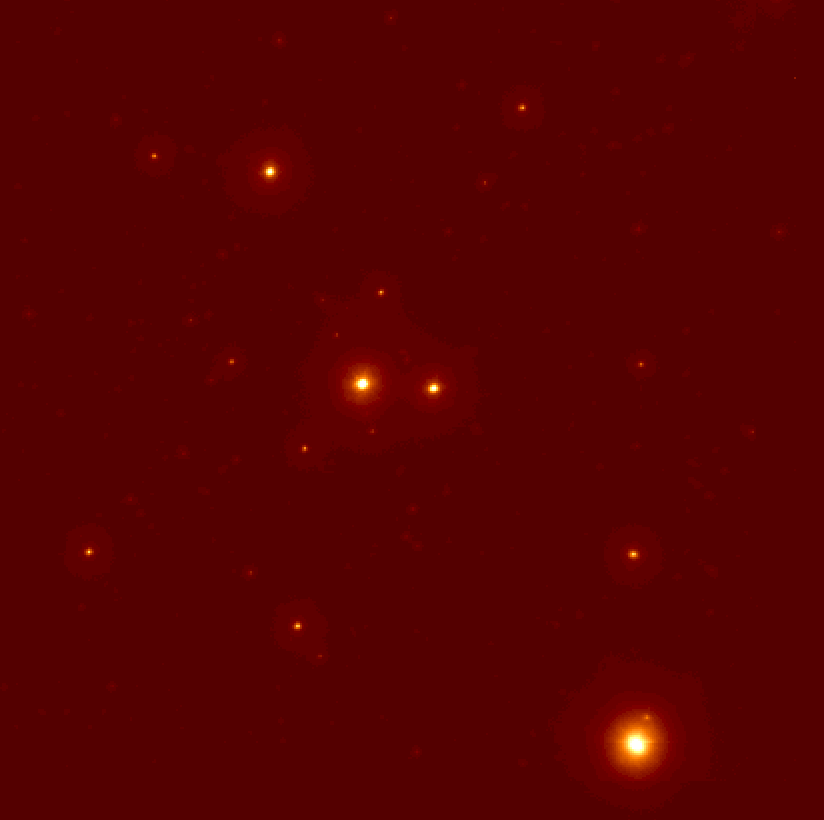

You're done with the first part of data reduction! Next steps are to do the data analysis with the analysis.py file, and a guide for this should be at the same location on confluence as this one - TheAnalysisGuide.ipynb